In [50]:
!pip install -q kaggle

In [51]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"salmaeng","key":"231d5b452cf64da4dc6c6ff6eb15b34a"}'}

In [52]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [53]:

#Make directory named kaggle and copy kaggle.json file there.
#Change the permissions of the file.
!chmod 600 ~/.kaggle/kaggle.json

In [54]:
!kaggle datasets download -d uciml/pima-indians-diabetes-database

pima-indians-diabetes-database.zip: Skipping, found more recently modified local copy (use --force to force download)


In [55]:
#unzip the folder
!mkdir train
!unzip pima-indians-diabetes-database.zip -d train

mkdir: cannot create directory ‘train’: File exists
Archive:  pima-indians-diabetes-database.zip
replace train/diabetes.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train/diabetes.csv      


In [56]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [160]:
# load the data
data = pd.read_csv('/content/train/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [162]:
feature_columns = list(data.columns)
feature_columns.remove('Outcome')
feature_columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [163]:
from sklearn.impute import SimpleImputer

fill_values = SimpleImputer(missing_values=0, strategy="mean", copy=False)

data[feature_columns] = fill_values.fit_transform(data[feature_columns])

In [164]:
for column in feature_columns:
    print("============================================")
    print(f"{column} ==> Missing zeros : {len(data.loc[data[column] == 0])}")

Pregnancies ==> Missing zeros : 0
Glucose ==> Missing zeros : 0
BloodPressure ==> Missing zeros : 0
SkinThickness ==> Missing zeros : 0
Insulin ==> Missing zeros : 0
BMI ==> Missing zeros : 0
DiabetesPedigreeFunction ==> Missing zeros : 0
Age ==> Missing zeros : 0


In [165]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000000,148.0,72.0,35.00000,155.548223,33.6,0.627,50.0,1
1,1.000000,85.0,66.0,29.00000,155.548223,26.6,0.351,31.0,0
2,8.000000,183.0,64.0,29.15342,155.548223,23.3,0.672,32.0,1
3,1.000000,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0,0
4,4.494673,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0,1


# Improve performance using ensambles

Ensambles could boost the accuracy of the machine learning model.

In this section, We will use Bagging ensamble method. Also, I we will use boosting ensamble methods such as Ada Boost and schochastic gradient boosting. Additionally, we will utilize voting ensamble methods to combine the predictions from multiple algorithms. 

So, let's dig!


# Combine models into ensamble predictions

There are three popular methods to combine the predictions from different models. These are :

- Bagging: The other name is [Bootstrap aggrigating](https://en.wikipedia.org/wiki/Bootstrap_aggregating). **B**ootstrap **agg**regat**ing** tends to build multiple models(usually from the same type) from different subsamples of the training dataset. 

- [Boosting](https://en.wikipedia.org/wiki/Boosting_(machine_learning)): is another technique to build multiple models (also from the same type); however each model learns to fix the prediction errors of the previous model in the sequence of models. It is mainly used to balance the bias and variance in the supervised machine learning models. It is an algorithm that converts weak learners into strong one. 


- Voting: It intended to build multiple models **from different types** an then it uses the statistical methods (mean for example) to combine predictions. 



For this tutorial, I will utilize the pima indian diabetes from the UCI machine learning repository. In the colab notebook, I managed to fetch the data via kaggle API. 

# 1. Bagging Algorithm 
Bootstrap aggrigation or baggibg for short manages to take multiple samples with replacement for each sample from the training set. 

The final predictions are calculated by taking the average across the predictions generated by the submodels. 

There are three bagging models we might use: 
- Bagging decision trees
- Random Forest
- Extra Trees

Bagging has its best performance with algorithms that have high variance. In the following example, we will develop the `BaggingClassifier()` with the classification and regression trees algorithm (`DecisionTreeClassifier()`) within sklearn package. 

In [166]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [167]:
# split the data into train and test
X = data.iloc[:, :-1].values

In [168]:
y = data.iloc[:, -1].values

In [169]:
print(X.shape, y.shape)

(768, 8) (768,)


In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)

ValueError: ignored

In [68]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

BaggingClassifier Parameters:

`base_estimator` : The base estimator to fit on random 
subsets of the dataset. If None, then the base estimator is a decision tree.

`n_estimators` : The number of base estimators in the ensemble.

`max_samples` : The number of samples to draw from X to train each base estimator.

`max_features` : The number of features to draw from X to train each base estimator.

`bootstrap` : Whether samples are drawn with replacement. If False, sampling without replacement is performed.

`bootstrap_features` : Whether features are drawn with replacement.

`oob_score` : Whether to use out-of-bag samples to estimate the generalization error.

`warm_start` : When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise, just fit a whole new ensemble.

In [69]:

tree = DecisionTreeClassifier()
bagging_clf = BaggingClassifier(base_estimator=tree, n_estimators=1500, random_state=42)
bagging_clf.fit(X_train, y_train)

evaluate(bagging_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[350   0]
 [  0 187]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    350.0  187.0       1.0      537.0         537.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[126  24]
 [ 38  43]]
ACCURACY SCORE:
0.7316
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.768293   0.641791  0.731602    0.705042      0.723935
recall       0.840000   0.530864  0.731602    0.685432      0.731602
f1-score     0.802548   0.581081  0.731602    0.691814      0.724891
support    150.000000  81.000000  0.731602  231.000000    231.000000


In [70]:
scores = {
    'Bagging Classifier': {
        'Train': accuracy_score(y_train, bagging_clf.predict(X_train)),
        'Test': accuracy_score(y_test, bagging_clf.predict(X_test)),
    },
}

As shown, we got a good performance compared to the model we developed in the previous results of using normal methods. 


# 2. Random Forest 

Now, let's take a shot and try the Randomforest model. It works like the bagged decision tree class, however it involving reducing the correlation between individual classifiers. It only consider the random subset of features per split instead of following the greedy approach to pick the best split point. 

`n_estimators`: The number of trees in the forest.
criterion: The function to measure the quality of a split. Supported criteria are "gini" for the Gini impurity and "entropy" for the information gain.

`max_depth`: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

`min_samples_split`: The minimum number of samples required to split an internal node.

`min_samples_leaf`: The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

`min_weight_fraction_leaf`: The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.
max_features: The number of features to consider when looking for the best split.

`max_leaf_nodes`: Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.

`min_impurity_decrease`: A node will be split if this split induces a decrease of the impurity greater than or equal to this value.

`min_impurity_split`: Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf.

`bootstrap`: Whether bootstrap samples are used when building trees. If False, the whole datset is used to build each tree.

`oob_score`: Whether to use out-of-bag samples to estimate the generalization accuracy.

`warm_start` : When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise, just fit a whole new ensemble.

In [71]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42, n_estimators=1000)
rf_clf.fit(X_train, y_train)
evaluate(rf_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[350   0]
 [  0 187]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    350.0  187.0       1.0      537.0         537.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[127  23]
 [ 38  43]]
ACCURACY SCORE:
0.7359
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.769697   0.651515  0.735931    0.710606      0.728257
recall       0.846667   0.530864  0.735931    0.688765      0.735931
f1-score     0.806349   0.585034  0.735931    0.695692      0.728745
support    150.000000  81.000000  0.735931  231.000000    231.000000


In [72]:
scores['Random Forest'] = {
        'Train': accuracy_score(y_train, rf_clf.predict(X_train)),
        'Test': accuracy_score(y_test, rf_clf.predict(X_test)),
    }

We got a less accuracy! that's because it is only considered a certain number of features to choose the best split. If we tried to reduce `num_feat`, the accuracy would increase, and if we omit that variable inside the §RandomForestClassifier()`, you would get almost the same result using the bagging decision tree approach. 

# Extra trees
It is a modification of bagging where random trees are built from samples of the training set. 
This class implements a meta estimator that fits a number of randomized decision trees (a.k.a. extra-trees) on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

`ExtraTreeClassifier` Parameters:

`n_estimators`: The number of trees in the forest.

`criterion`: The function to measure the quality of a split. Supported criteria are "gini" for the Gini impurity and "entropy" for the information gain.

`max_depth`: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

min_samples_split: The minimum number of samples required to split an internal node.

min_samples_leaf: The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least 

min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

min_weight_fraction_leaf: The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.
max_features: The number of features to consider when looking for the best split.

max_leaf_nodes: Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.

min_impurity_decrease: A node will be split if this split induces a decrease of the impurity greater than or equal to this value.

min_impurity_split: Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf.

bootstrap: Whether bootstrap samples are used when building trees. If False, the whole datset is used to build each tree.

oob_score: Whether to use out-of-bag samples to estimate the generalization accuracy.

warm_start : When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise, just fit a whole new ensemble.

In [73]:
from sklearn.ensemble import ExtraTreesClassifier

ex_tree_clf = ExtraTreesClassifier(n_estimators=1000, max_features=7, random_state=42)
ex_tree_clf.fit(X_train, y_train)
evaluate(ex_tree_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[350   0]
 [  0 187]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    350.0  187.0       1.0      537.0         537.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[124  26]
 [ 32  49]]
ACCURACY SCORE:
0.7489
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.794872   0.653333  0.748918    0.724103      0.745241
recall       0.826667   0.604938  0.748918    0.715802      0.748918
f1-score     0.810458   0.628205  0.748918    0.719331      0.746551
support    150.000000  81.000000  0.748918  231.000000    231.000000


In [74]:
scores['Extra Tree'] = {
        'Train': accuracy_score(y_train, ex_tree_clf.predict(X_train)),
        'Test': accuracy_score(y_test, ex_tree_clf.predict(X_test)),
    }



---
# 2. Boosting 
This creates a sequence of models that tries to correct errors for the models preceding in the sequence. Once developed, the model make predictions that might be weighted by their accuracy. After that, the results are combined to create the final out prediction. There are two most common boosting ensemble machine learning algorithms:

- AdaBoost 
It works by weighting the dataset instances by classifying difficulties allowing the algorithm to pay attention to them in the construction of the subsequent model in the sequence.  


AdaBoostClassifier Params:

base_estimator : The base estimator from which the boosted ensemble is built.

n_estimators : The maximum number of estimators at which boosting is terminated. In case of perfect fit, the learning procedure is stopped early.

learning_rate : Learning rate shrinks the contribution of each classifier by learning_rate. There is a trade-off between learning_rate and n_estimators.

algorithm : If 'SAMME.R' then use the SAMME.R real boosting algorithm. base_estimator must support calculation of class probabilities. If 'SAMME' then use the SAMME discrete boosting algorithm. The SAMME.R algorithm typically converges faster than SAMME, achieving a lower test error with fewer boosting iterations.


In [75]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost_clf = AdaBoostClassifier(n_estimators=30)
ada_boost_clf.fit(X_train, y_train)
evaluate(ada_boost_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[314  36]
 [ 49 138]]
ACCURACY SCORE:
0.8417
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.865014    0.793103  0.841713    0.829059      0.839972
recall       0.897143    0.737968  0.841713    0.817555      0.841713
f1-score     0.880785    0.764543  0.841713    0.822664      0.840306
support    350.000000  187.000000  0.841713  537.000000    537.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[129  21]
 [ 36  45]]
ACCURACY SCORE:
0.7532
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.781818   0.681818  0.753247    0.731818      0.746753
recall       0.860000   0.555556  0.753247    0.707778      0.753247
f1-score     0.819048   0.612245  0.753247    0.715646      0.746532
support    150.000000  81.000000  0.753247  231.000000    231.000000


In [76]:
scores['AdaBoost'] = {
        'Train': accuracy_score(y_train, ada_boost_clf.predict(X_train)),
        'Test': accuracy_score(y_test, ada_boost_clf.predict(X_test)),
    }

Stochastic Gradient Boosting (also called Gradient Boosting Machines) are one of the most sophisticated ensemble techniques. It is also a technique that is proving to be perhaps of the the best techniques available for improving performance via ensembles.



GB builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage n_classes_ regression trees are fit on the negative gradient of the binomial or multinomial deviance loss function. Binary classification is a special case where only a single regression tree is induced.

GradientBoostingClassifier Parameters:

`loss` : loss function to be optimized. 'deviance' refers to deviance (= logistic regression) for classification with probabilistic outputs. For loss 'exponential' gradient boosting recovers the AdaBoost algorithm.

learning_rate : learning rate shrinks the contribution of each tree by learning_rate. There is a trade-off between learning_rate and n_estimators.

n_estimators : The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.

subsample : The fraction of samples to be used for fitting the individual base learners. If smaller than 1.0 this results in Stochastic Gradient Boosting. subsample interacts with the parameter n_estimators. Choosing subsample < 1.0 leads to a reduction of variance and an increase in bias.

criterion : The function to measure the quality of a split. Supported criteria are "friedman_mse" for the mean squared error with improvement score by Friedman, "mse" for mean squared error, and "mae" for the mean absolute error. The default value of "friedman_mse" is generally the best as it can provide a better approximation in some cases.

min_samples_split: The minimum number of samples required to split an internal node.

min_samples_leaf: The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

min_weight_fraction_leaf: The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.

max_depth: maximum depth of the individual regression estimators. The maximum depth limits the number of nodes in the tree. Tune this parameter for best performance; the best value depends on the interaction of the input variables.

min_impurity_decrease: A node will be split if this split induces a decrease of the impurity greater than or equal to this value.

min_impurity_split: Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf.

max_features: The number of features to consider when looking for the best split.

max_leaf_nodes: Grow trees with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.

warm_start: When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise, just erase the previous solution.

validation_fraction: The proportion of training data to set aside as validation set for early stopping. Must be between 0 and 1. Only used if n_iter_no_change is set to an integer.

n_iter_no_change: used to decide if early stopping will be used to terminate training when validation score is not improving. By default it is set to None to disable early stopping. If set to a number, it will set aside validation_fraction size of the training data as validation and terminate training when validation score is not improving in all of the previous n_iter_no_change numbers of iterations. The split is stratified.

tol: Tolerance for the early stopping. When the loss is not improving by at least tol for n_iter_no_change iterations (if set to a number), the training stops.

ccp_alpha: Complexity parameter used for Minimal Cost-Complexity Pruning. The subtree with the largest cost complexity that is smaller than ccp_alpha will be chosen.

In [77]:
from sklearn.ensemble import GradientBoostingClassifier

grad_boost_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
grad_boost_clf.fit(X_train, y_train)
evaluate(grad_boost_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[339  11]
 [ 26 161]]
ACCURACY SCORE:
0.9311
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.928767    0.936047  0.931099    0.932407      0.931302
recall       0.968571    0.860963  0.931099    0.914767      0.931099
f1-score     0.948252    0.896936  0.931099    0.922594      0.930382
support    350.000000  187.000000  0.931099  537.000000    537.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[126  24]
 [ 37  44]]
ACCURACY SCORE:
0.7359
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.773006   0.647059  0.735931    0.710032      0.728843
recall       0.840000   0.543210  0.735931    0.691605      0.735931
f1-score     0.805112   0.590604  0.735931    0.697858      0.729895
support    150.000000  81.000000  0.735931  231.000000    231.000000


In [78]:
scores['Gradient Boosting'] = {
        'Train': accuracy_score(y_train, grad_boost_clf.predict(X_train)),
        'Test': accuracy_score(y_test, grad_boost_clf.predict(X_test)),
    }

- Stochastic Gradient Boosting (Gradient Boosting Machines) 

Although it considered the most sophisticated ensemble technique, it is considered to be the best technique to improve the machine learning performance via ensamble

# 3. Voting Ensemble
It is simple and easy to implement. First, it creates a two standalone models(may be more depending on the use case) from the dataset. Then, a voting classifier is used to wrap the models and average the predictions of the submodels when introducing the new data. 

Aalthough the predictions of the submodels have weights, unfortunately, we cannot adjust those weights to increase the performance. Those weights may be adjusted using different approach which is **[Stacked Aggregation](https://en.wikipedia.org/wiki/Ensemble_learning#Stacking)**. Unfortunately, this algorithm is not included within the sklearn library yet. You can either implement it from scratch by yourself or use the [ML-Ensemble library](http://ml-ensemble.com/). 

> [H2O library](http://docs.h2o.ai/h2o-tutorials/latest-stable/tutorials/ensembles-stacking/index.html) offers a decent API to implement the Stack Aggregation ensemble in R, you can check the documentation [here](http://docs.h2o.ai/h2o-tutorials/latest-stable/tutorials/ensembles-stacking/index.html). 

VotingClassifier :

estimators : Invoking the fit method on the VotingClassifier will fit clones of those original estimators that will be stored in the class attribute self.estimators_.

voting : If 'hard', uses predicted class labels for majority rule voting. Else if 'soft', predicts the class label based on the argmax of the sums of the predicted probabilities, which is recommended for an ensemble of well-calibrated classifiers.

In the following snippet, we combine three different ml algorithms and we will use the `VotingClassifier()` class within the sklearn to get max accuracy out of the models combined. 

In [79]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

estimators = []
log_reg = LogisticRegression(solver='liblinear')
estimators.append(('Logistic', log_reg))

tree = DecisionTreeClassifier()
estimators.append(('Tree', tree))

svm_clf = SVC(gamma='scale')
estimators.append(('SVM', svm_clf))

voting = VotingClassifier(estimators=estimators)
voting.fit(X_train, y_train)

evaluate(voting, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[328  22]
 [ 75 112]]
ACCURACY SCORE:
0.8194
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.813896    0.835821  0.819367    0.824858      0.821531
recall       0.937143    0.598930  0.819367    0.768037      0.819367
f1-score     0.871182    0.697819  0.819367    0.784501      0.810812
support    350.000000  187.000000  0.819367  537.000000    537.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[135  15]
 [ 40  41]]
ACCURACY SCORE:
0.7619
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.771429   0.732143  0.761905    0.751786      0.757653
recall       0.900000   0.506173  0.761905    0.703086      0.761905
f1-score     0.830769   0.598540  0.761905    0.714655      0.749338
support    150.000000  81.000000  0.761905  231.000000    231.000000


In [80]:
scores['Voting'] = {
        'Train': accuracy_score(y_train, voting.predict(X_train)),
        'Test': accuracy_score(y_test, voting.predict(X_test)),
    }

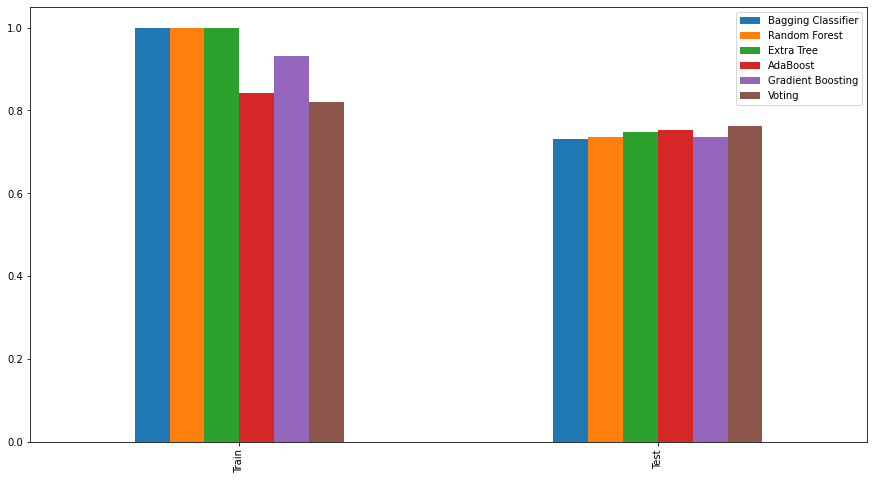

In [116]:
import matplotlib.pyplot as plt

scores_df = pd.DataFrame(scores)
# with plt.xkcd():

scores_df.plot(kind='bar', figsize=(15, 8))
# plt.show()

In [86]:
!pip install mlens -q


     |████████████████████████████████| 235kB 5.9MB/s 


In [149]:
from numpy import hstack
from numpy import vstack
from numpy import asarray

In [154]:
# create a list of base-models
def get_models():
	models = list()
	models.append(LogisticRegression(solver='liblinear'))
	models.append(DecisionTreeClassifier())
	models.append(SVC(gamma='scale', probability=True))
	models.append(GaussianNB())
	models.append(KNeighborsClassifier())
	models.append(AdaBoostClassifier())
	models.append(BaggingClassifier(n_estimators=10))
	models.append(RandomForestClassifier(n_estimators=10))
	models.append(ExtraTreesClassifier(n_estimators=10))
	return models

In [150]:
# collect out of fold predictions form k-fold cross validation
def get_out_of_fold_predictions(X, y, models):
	meta_X, meta_y = list(), list()
	# define split of data
	kfold = KFold(n_splits=10, shuffle=True)
	# enumerate splits
	for train_ix, test_ix in kfold.split(X):
		fold_yhats = list()
		# get data
		train_X, test_X = X[train_ix], X[test_ix]
		train_y, test_y = y[train_ix], y[test_ix]
		meta_y.extend(test_y)
		# fit and make predictions with each sub-model
		for model in models:
			model.fit(train_X, train_y)
			yhat = model.predict_proba(test_X)
			# store columns
			fold_yhats.append(yhat)
		# store fold yhats as columns
		meta_X.append(hstack(fold_yhats))
	return vstack(meta_X), asarray(meta_y)

In [151]:
def fit_meta_model(X, y):
	model = LogisticRegression(solver='liblinear')
	model.fit(X, y)
	return model

In [ ]:
def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

In [179]:
# evaluate a list of models on a dataset
def evaluate_models(X, y, models):
	for model in models:
		yhat = model.predict(X)
		acc = accuracy_score(y, yhat)
		print('%s: %.3f' % (model.__class__.__name__, acc*100))

In [174]:
# fit all base models on the training dataset
def fit_base_models(X, y, models):
	for model in models:
		model.fit(X, y)

In [153]:
# make predictions with stacked model
def super_learner_predictions(X, models, meta_model):
	meta_X = list()
	for model in models:
		yhat = model.predict_proba(X)
		meta_X.append(yhat)
	meta_X = hstack(meta_X)
	# predict
	return meta_model.predict(meta_X)

In [170]:
# split
X, X_val, y, y_val = train_test_split(X, y, test_size=0.3, stratify = y)
print('Train', X.shape, y.shape, 'Test', X_val.shape, y_val.shape)

Train (537, 8) (537,) Test (231, 8) (231,)


In [175]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
# get models
models = get_models()
# get out of fold predictions
meta_X, meta_y = get_out_of_fold_predictions(X, y, models)
print('Meta ', meta_X.shape, meta_y.shape)
# fit base models
fit_base_models(X, y, models)
# fit the meta model
meta_model = fit_meta_model(meta_X, meta_y)
# evaluate base models
evaluate_models(X_val, y_val, models)
# evaluate meta model
yhat = super_learner_predictions(X_val, models, meta_model)
print('Super Learner: %.3f' % (accuracy_score(y_val, yhat) * 100))

Meta  (537, 18) (537,)
LogisticRegression: 74.892
DecisionTreeClassifier: 70.130
SVC: 74.459
GaussianNB: 76.190
KNeighborsClassifier: 70.130
AdaBoostClassifier: 72.727
BaggingClassifier: 75.758
RandomForestClassifier: 74.026
ExtraTreesClassifier: 72.294
Super Learner: 77.056


In [176]:
# create the super learner
def get_super_learner(X):
	ensemble = SuperLearner(scorer=accuracy_score, folds=10, shuffle=True, sample_size=len(X))
	# add base models
	models = get_models()
	ensemble.add(models)
	# add the meta model
	ensemble.add_meta(LogisticRegression(solver='lbfgs'))
	return ensemble

In [177]:
# create the super learner
ensemble = get_super_learner(X)
# fit the super learner
ensemble.fit(X, y)
# summarize base learners
print(ensemble.data)
# make predictions on hold out set
yhat = ensemble.predict(X_val)
print('Super Learner: %.3f' % (accuracy_score(y_val, yhat) * 100))


                                   score-m  score-s  ft-m  ft-s  pt-m  pt-s
layer-1  adaboostclassifier           0.73     0.04  0.23  0.02  0.02  0.00
layer-1  baggingclassifier            0.75     0.06  0.06  0.01  0.00  0.00
layer-1  decisiontreeclassifier       0.66     0.06  0.01  0.00  0.00  0.00
layer-1  extratreesclassifier         0.76     0.05  0.03  0.01  0.00  0.00
layer-1  gaussiannb                   0.74     0.05  0.00  0.00  0.00  0.00
layer-1  kneighborsclassifier         0.72     0.04  0.00  0.00  0.01  0.00
layer-1  logisticregression           0.76     0.06  0.01  0.00  0.00  0.00
layer-1  randomforestclassifier       0.74     0.05  0.04  0.01  0.00  0.00
layer-1  svc                          0.74     0.04  0.05  0.00  0.00  0.00

Super Learner: 76.623


In [178]:
accuracy_score(y_val, yhat) * 100

76.62337662337663

In [144]:
from mlens.ensemble import SuperLearner
from mlens.metrics import make_scorer

estimators = []
log_reg = LogisticRegression(solver='liblinear')
estimators.append(('Logistic', log_reg))

tree = DecisionTreeClassifier()
estimators.append(('Tree', tree))

svm_clf = SVC(gamma='scale')
estimators.append(('SVM', svm_clf))

ensemble = SuperLearner()
ensemble.add(estimators).add_meta(LogisticRegression())
ensemble.fit(X_train, y_train)


SuperLearner(array_check=None, backend=None, folds=2,
       layers=[Layer(backend='threading', dtype=<class 'numpy.float32'>, n_jobs=-1,
   name='layer-1', propagate_features=None, raise_on_exception=True,
   random_state=None, shuffle=False,
   stack=[Group(backend='threading', dtype=<class 'numpy.float32'>,
   indexer=FoldIndex(X=None, folds=2, raise_on_ex...rer=None)],
   n_jobs=-1, name='group-6', raise_on_exception=True, transformers=[])],
   verbose=0)],
       model_selection=False, n_jobs=None, raise_on_exception=True,
       random_state=None, sample_size=20, scorer=None, shuffle=False,
       verbose=False)

In [145]:
y_train_pred = ensemble.predict_proba(X_train)
y_pred_train.shape
# rou = np.argmax(y_train_pred, axis=1,)
# rou

(537, 3)

In [146]:
from mlens.ensemble import SuperLearner
from mlens.metrics.metrics import rmse
from sklearn.datasets import load_boston
from sklearn.linear_model import Lasso
from sklearn.svm import SVR

X, y = load_boston(True)
ensemble = SuperLearner()
ensemble.add([SVR(), ('can name some or all est', Lasso())])
ensemble.add_meta(SVR())

ensemble.fit(X, y)
preds = ensemble.predict(X)
rmse(y, preds)

5.3516780968766255

In [127]:
y_train_pred = ensemble.predict(X_train)
ff = make_scorer(accuracy_score(y_train, y_train_pred))
# ((y_train_pred == y_train).all(axis=1).sum() / y_train_pred.shape[0])

ValueError: ignored

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, 


def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

In [97]:
def get_classification_metric(testy, probs):
    from sklearn.metrics import precision_recall_curve
    precision, recall, thresholds = precision_recall_curve(testy, probs[:,1])
    # convert to f score
    fscore = (2 * precision * recall) / (precision + recall)
    # locate the index of the largest f score
    ix = np.argmax(fscore)
    return fscore[ix]

In [101]:
from mlens.metrics import make_scorer 

In [110]:
scores_df


,Bagging Classifier,Random Forest,Extra Tree,AdaBoost,Gradient Boosting,Voting
Train,1.000000,1.000000,1.000000,0.841713,0.931099,0.819367
Test,0.731602,0.735931,0.748918,0.753247,0.735931,0.761905


In [111]:
!kaggle datasets download -d vikrishnan/boston-house-prices

  0% 0.00/12.8k [00:00<?, ?B/s]
100% 12.8k/12.8k [00:00<00:00, 21.4MB/s]


In [112]:
#unzip the folder
!mkdir boston
!unzip boston-house-prices.zip -d boston

Archive:  boston-house-prices.zip
  inflating: boston/housing.csv      


In [113]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('/content/boston/housing.csv', header=None, delimiter=r"\s+", names=column_names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
